#### Credit Card customers

**Etapas:**
* 1 - Definir o Problema de Negócio
* 2 - Coletar os Dados e Obter uma Visão Geral
* 3 - Análise Exploratória dos Dados (AED)
* 4 - Dividir os Dados em Conjuntos de Treino e Teste
* 5 - Engenharia de Features, Limpeza de Dados e Pré-processamento
* 6 - Treinamento e Comparação de Modelos, Otimização
* 7 - Teste e Avaliação do Modelo
* 8 - Concluir e Interpretar os Resultados

#### 1 - Definir o Problema de Negócio:
- **Problema de Negócio:**
O dataset de clientes de cartão de crédito fornece informações sobre clientes que cancelaram ou mantiveram seu cartão de crédito. O problema de negócio é identificar os fatores que influenciam o cancelamento do cartão e prever quais clientes estão mais propensos a cancelar o serviço no futuro. Essa previsão ajudará a instituição financeira a tomar ações preventivas para reduzir o churn e melhorar a retenção de clientes.

- **Objetivo Principal:**
Desenvolver um modelo preditivo para identificar clientes com maior probabilidade de cancelar seu cartão de crédito, permitindo que a instituição financeira implemente estratégias de retenção direcionadas e ajuste suas ofertas e serviços para melhorar a fidelidade do cliente.

- **Impacto no Negócio:** 

* Redução do Churn: Com uma previsão precisa dos clientes propensos a cancelar, a instituição pode aplicar estratégias específicas para manter esses clientes, reduzindo a taxa de churn.
* Otimização de Ofertas: Melhorar as ofertas e o atendimento ao cliente com base nas características dos clientes que mais frequentemente cancelam, aumentando a satisfação e a fidelidade.
* Aumento da Rentabilidade: Retendo clientes valiosos e reduzindo o churn, a instituição pode melhorar sua rentabilidade e reduzir os custos associados à aquisição de novos clientes.
* Esse foco ajudará a instituição financeira a implementar medidas eficazes para melhorar a retenção e a satisfação dos clientes, o que é crucial para manter uma base de clientes sólida e rentável.

#### 2 - Coletar os Dados e Obter uma Visão Geral
###### Coleta dos Dados
- Download do Dataset no Kaggle:[Credit Card customers](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?sort=votes)


In [22]:
import pandas as pd
import numpy as np
df = pd.read_csv('BankChurners.csv')

In [23]:
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1)

######  Obter uma Visão Geral dos Dados

In [24]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


###### Colunas do dasatset e suas respectivas descrições:
- **CLIENTNUM:** Número do cliente. Identificador único para o cliente que possui a conta. 
- **Attrition_Flag**: Variável de evento interno (atividade do cliente) - se a conta está fechada, então 1; caso contrário, 0.
- **Customer_Age**: Idade do cliente em anos.
- **Gender**: Gênero do cliente - M=Masculino, F=Feminino. 
- **Dependent_count**: Número de dependentes do cliente. 
- **Education_Level**: Nível educacional do titular da conta (exemplo: ensino médio, graduação, etc.). 
- **Marital_Status**: Estado civil - Casado, Solteiro, Divorciado, Desconhecido. 
- **Income_Category**: Categoria de renda anual do titular da conta (<40K, 60K, 80K, 120K, >). )
- **Card_Category**: Tipo de cartão (Azul, Prata, Ouro, Platina). 
- **Months_on_book**: Período de relacionamento com o banco.
- **Total_Relationship_Count**: Número total de produtos que o cliente possui com o banco. 
- **Months_Inactive_12_mon**: Número de meses inativos nos últimos 12 meses.
- **Contacts_Count_12_mon**: Número de contatos realizados nos últimos 12 meses. 
- **Credit_Limit**: Limite de crédito no cartão de crédito. 
- **Total_Revolving_Bal**: Total de saldo rotativo no cartão de crédito. 
- **Avg_Open_To_Buy**: Linha de crédito disponível para compra (média dos últimos 12 meses). 
- **Total_Amt_Chng_Q4_Q1**: Mudança no valor das transações (Q4 sobre Q1). 
- **Total_Trans_Amt**: Valor total das transações (últimos 12 meses). 
- **Total_Trans_Ct**: Contagem total de transações (últimos 12 meses). 
- **Total_Ct_Chng_Q4_Q1**: Mudança na contagem de transações (Q4 sobre Q1). 
- **Avg_Utilization_Ratio**: Razão média de utilização do cartão de crédito. 

In [25]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [26]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

 Verificando a cardinalidade dos dados.

In [28]:
df.nunique().sort_values(ascending=False)

CLIENTNUM                   10127
Avg_Open_To_Buy              6813
Credit_Limit                 6205
Total_Trans_Amt              5033
Total_Revolving_Bal          1974
Total_Amt_Chng_Q4_Q1         1158
Avg_Utilization_Ratio         964
Total_Ct_Chng_Q4_Q1           830
Total_Trans_Ct                126
Customer_Age                   45
Months_on_book                 44
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Education_Level                 7
Income_Category                 6
Dependent_count                 6
Total_Relationship_Count        6
Card_Category                   4
Marital_Status                  4
Attrition_Flag                  2
Gender                          2
dtype: int64

Verificando se há valores nulos.

In [29]:
df.isnull().sum().sort_values(ascending=False)

CLIENTNUM                   0
Months_Inactive_12_mon      0
Total_Ct_Chng_Q4_Q1         0
Total_Trans_Ct              0
Total_Trans_Amt             0
Total_Amt_Chng_Q4_Q1        0
Avg_Open_To_Buy             0
Total_Revolving_Bal         0
Credit_Limit                0
Contacts_Count_12_mon       0
Total_Relationship_Count    0
Attrition_Flag              0
Months_on_book              0
Card_Category               0
Income_Category             0
Marital_Status              0
Education_Level             0
Dependent_count             0
Gender                      0
Customer_Age                0
Avg_Utilization_Ratio       0
dtype: int64

In [30]:
print(df.dtypes)

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


#### 3 - Análise Exploratória dos dados (AED)

Importanto biblioteca de visualização.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

Criando gráfico para visualizar a coluna 'Attrition_Flag' e avaliar a porcentagem de clientes que "churnaram"(Abandoram o serviço).

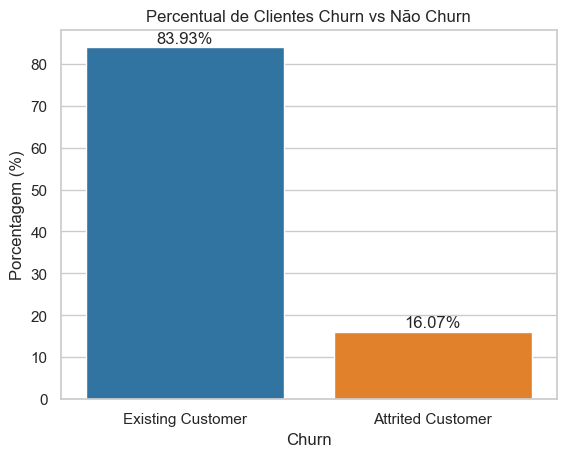

In [32]:
churn_counts = df['Attrition_Flag'].value_counts(normalize=True)*100

# Paleta de cores
custom_palette = ['#1f77b4', '#ff7f0e']

sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=custom_palette)
plt.title('Percentual de Clientes Churn vs Não Churn')
plt.xlabel('Churn')
plt.ylabel('Porcentagem (%)')

for i in range(len(churn_counts)):
     plt.text(i, churn_counts.values[i] + 1, f'{churn_counts.values[i]:.2f}%', ha='center')
plt.show()


Seprando as variáveis categóricas das variáveis numéricas para uma melhor análise.

In [33]:
categorical = df.select_dtypes(include='object').columns
categorical
numeric = df.select_dtypes(include=['float','int']).columns 
numeric

categorical = pd.DataFrame({
    'categorical' : list(categorical)    
})

numeric = pd.DataFrame({
    'numeric' : list(numeric)
})

Variáveis Categóricas:

In [34]:
categorical

,categorical
0,Attrition_Flag
1,Gender
2,Education_Level
3,Marital_Status
4,Income_Category
5,Card_Category


Variáveis Numéricas:

In [35]:
numeric

,numeric
0,CLIENTNUM
1,Customer_Age
2,Dependent_count
3,Months_on_book
4,Total_Relationship_Count
5,Months_Inactive_12_mon
6,Contacts_Count_12_mon
7,Credit_Limit
8,Total_Revolving_Bal
9,Avg_Open_To_Buy


A análise será conduzida da seguinte forma: será criada uma visualização que compare o total de cada gênero (feminino e masculino). A visualização incluirá dois gráficos por caracteríticas. Exemplo: O primeiro exibirá a distribuição geral dos gêneros, enquanto o segundo mostrará a distribuição dos gêneros especificamente para os clientes que tiveram "churnaram".

 **Iniciando a análise das variáveis categoricas:**
* Primeiramente checando valores únicos das colunas

In [36]:
gender = df['Gender'].unique()
Education_Level = df['Education_Level'].unique()
Marital_Status = df['Marital_Status'].unique()
Income_Category = df['Income_Category'].unique()
Card_Category = df['Card_Category'].unique()

print(f'Gender:{gender}')
print(f'Education_Level:{Education_Level}')
print(f'Marital_Status:{Marital_Status}')
print(f'Income_Category:{Income_Category}')
print(f'Card_Category:{Card_Category}')

Gender:['M' 'F']
Education_Level:['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status:['Married' 'Single' 'Unknown' 'Divorced']
Income_Category:['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category:['Blue' 'Gold' 'Silver' 'Platinum']


In [37]:
df[df['Marital_Status'] == 'Unknown']['Marital_Status'].value_counts()

Marital_Status
Unknown    749
Name: count, dtype: int64

In [38]:
df[df['Income_Category'] == 'Unknown']['Income_Category'].value_counts()

Income_Category
Unknown    1112
Name: count, dtype: int64

Existem valores Unknown(Desconhecidos) nas colunas Marital_Status e Income_Category, mais para frente iremos fazer o tratamento dos mesmos.

* Criando as visualizações

Criando visualizações do perfil dos clientes. 

In [ ]:
sns.set(style='whitegrid')
sns.set_palette(custom_palette)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.3)


def plot_percentage_bar(ax, data, category_col, order=None, rotate_labels=False):
    counts = data[category_col].value_counts(normalize=True) * 100   
    if order:
        counts = counts.reindex(order) 
    barplot = sns.barplot(x=counts.index, y=counts.values, ax=ax)   
    ax.set_ylabel('Porcentagem')
    ax.set_xlabel(category_col)
   

    for p in barplot.patches:
        percentage = f'{p.get_height():.1f}%' 
        barplot.annotate(percentage,
                         (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                         ha='center', va='center', fontsize=12, color='black')


    if rotate_labels:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Gênero dos clientes
plot_percentage_bar(axes[0, 0], df, 'Gender') 
axes[0, 0].set_title('Gênero')

# Por nível educacional
education_order = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
plot_percentage_bar(axes[0, 1], df, 'Education_Level', order=education_order, rotate_labels=True)
axes[0, 1].set_title('Nível Educacional')

# Estado Conjugal
marital_order = ['Unknown', 'Single', 'Married', 'Divorced']
plot_percentage_bar(axes[1, 0], df, 'Marital_Status', order=marital_order)
axes[1, 0].set_title('Estado Conjugal')

# Renda
income_order = ['Unknown','Less than $40K', '$40K - $60K', '$60K - $80K','$80K - $120K', '$120K +']
plot_percentage_bar(axes[1, 1], df, 'Income_Category', order=income_order)
axes[1, 1].set_title('Renda dos Clientes')

# Card_Category (ocupando uma linha inteira)
card_order = ['Blue', 'Gold', 'Silver', 'Platinum']
plot_percentage_bar(axes[2, 0], df, 'Card_Category', order=card_order)
axes[2, 0].set_title('Categoria do Cartão')
axes[2, 1].remove()  # Remove o gráfico vazio

plt.subplots_adjust(hspace=0.4, wspace=0.4, top=0.92)
fig.text(0.5, 0.96, 'Distribuição Geral dos Clientes', ha='center', va='center', fontsize=16, fontweight='bold')

plt.show()


##### **Perfil dos Clientes**
- Não há um grande desbalanceamento entre o gênero feminino e masculino.
- 30,9% dos clientes possuem gradução, e em segundo lugar possuem apenas o ensino médio 19,9% dos clientes.
- A maioria dos clientes são solteiros ou casados, e um minoria divorciados.
- 35,4% dos clientes possuem uma renda anual inferior a 40 mil.
- Uma grande parte(93,3%) dos clientes utilizam o cartão Blue.


Visualização de Proporção de cliente que churnaram(Abandonaram o serviço).

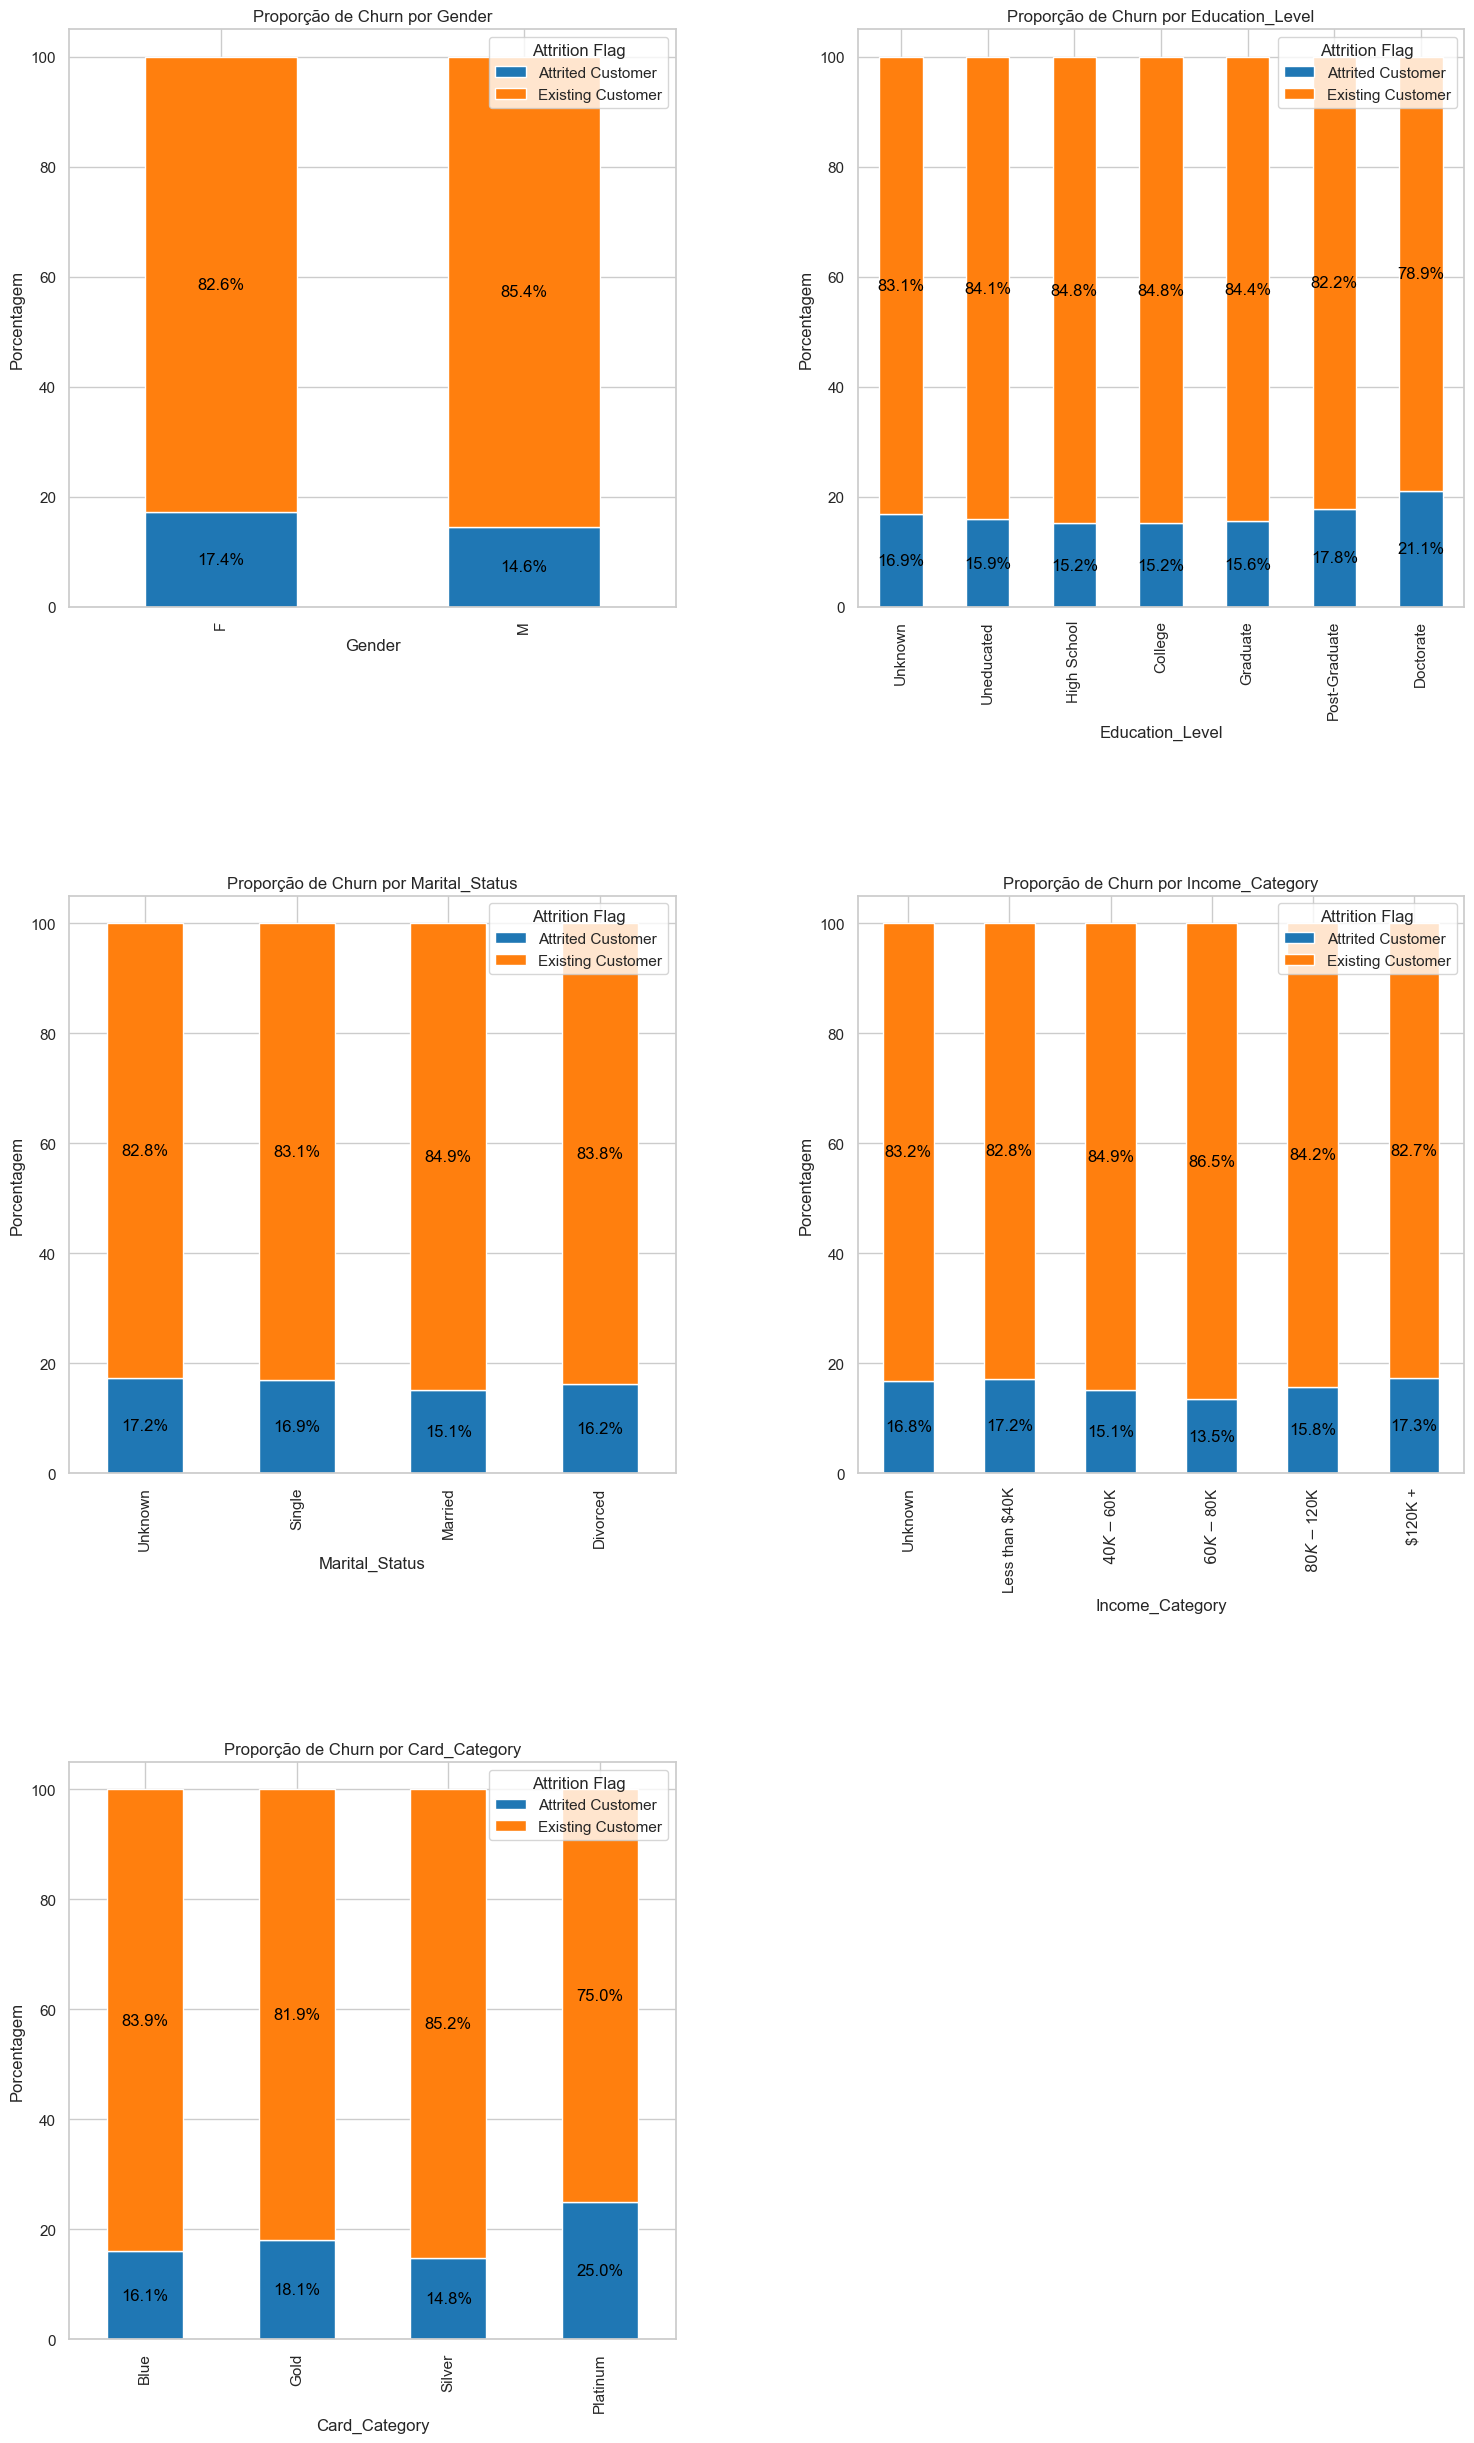

In [19]:
# Definindo a paleta de cores.
custom_palette = ['#1f77b4', '#ff7f0e']
sns.set_palette(custom_palette)

# Configuração dos gráficos.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 30))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
variables = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
# Definindo ordens.
education_order = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
marital_order = ['Unknown', 'Single', 'Married', 'Divorced']
income_order = ['Unknown','Less than $40K', '$40K - $60K', '$60K - $80K','$80K - $120K', '$120K +']
card_order = ['Blue', 'Gold', 'Silver', 'Platinum']

# Função para adicionar a porcentagem aos gráficos.
def add_percentage_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        label = f'{height:.1f}%'
        ax.text(x, y, label, ha='center', va='center', color='black')

# Loop para gerar gráficos de barras empilhadas para cada variável
for i, var in enumerate(variables):
    churn_var_count = pd.crosstab(df[var], df['Attrition_Flag'], normalize='index') * 100
   
# Ajustando as ordens para variáveis específicas
    if var == 'Education_Level':
        churn_var_count = churn_var_count.reindex(education_order)
    elif var == 'Marital_Status':
        churn_var_count = churn_var_count.reindex(marital_order) 
    elif var == 'Income_Category':
        churn_var_count = churn_var_count.reindex(income_order) 
    elif var == 'Card_Category':
        churn_var_count = churn_var_count.reindex(card_order)
    else:
        order = None

    row = i // 2
    col = i % 2
    churn_var_count.plot(kind='bar', stacked=True, color=custom_palette, ax=axes[row, col])
    add_percentage_labels(axes[row, col])   
    
# Definindo títulos e rótulos  
    axes[row, col].set_title(f'Proporção de Churn por {var}')
    axes[row, col].set_ylabel('Porcentagem')
    axes[row, col].set_xlabel(var)
    axes[row, col].legend(title='Attrition Flag')
    
# Desativando o subplot vazio.
axes[2, 1].axis('off')

# Mostrar todos os gráficos
plt.show()     

##### **Observações**
- Gênero: A taxa de churn é um pouco maior entre as mulheres do que entre os homens.
- Nível Educacional:O churn mais alto está entre os clientes com doutorado (22,8%), seguido por clientes que possum pós-graduação(17,8%).
- Estado Conjugal: Solteiros e divorciados tem uma taxa de churn um pouco maior, mas a diferença não é muito significativa.
- Renda: Os clientes com renda acima de 120k possuem um taxa de churn maior(17,3%), e em seguida clientes que possuem renda inferior a 40k(17,2%).
- Categoria do cartão: Clientes que utilizam o cartão Platinum, possuem uma taxa significativa de churn(33,3%).

##### **Insights Gerais**
- O gênero feminino apresenta uma maior tendência ao churn.
- Clientes com nível educacional mais elevado (Doutorado) têm uma taxa de churn um pouco maior.
- Clientes com renda abaixo de 40K e acima de 120K apresentam maior taxa de churn.
- A categoria do cartão é um indicativo importante de churn, especialmente com a alta taxa de abandono observada entre os clientes Platinum.



**Analisando agora as variáveis númericas:**


In [135]:
numeric

,numeric
0,CLIENTNUM
1,Customer_Age
2,Dependent_count
3,Months_on_book
4,Total_Relationship_Count
5,Months_Inactive_12_mon
6,Contacts_Count_12_mon
7,Credit_Limit
8,Total_Revolving_Bal
9,Avg_Open_To_Buy


Para explorar a distribuição dos dados, vamos criar uma visualização utilizando diferentes tipos de gráficos, incluindo histogramas, boxplots.
* Criando gráfico de histograma:

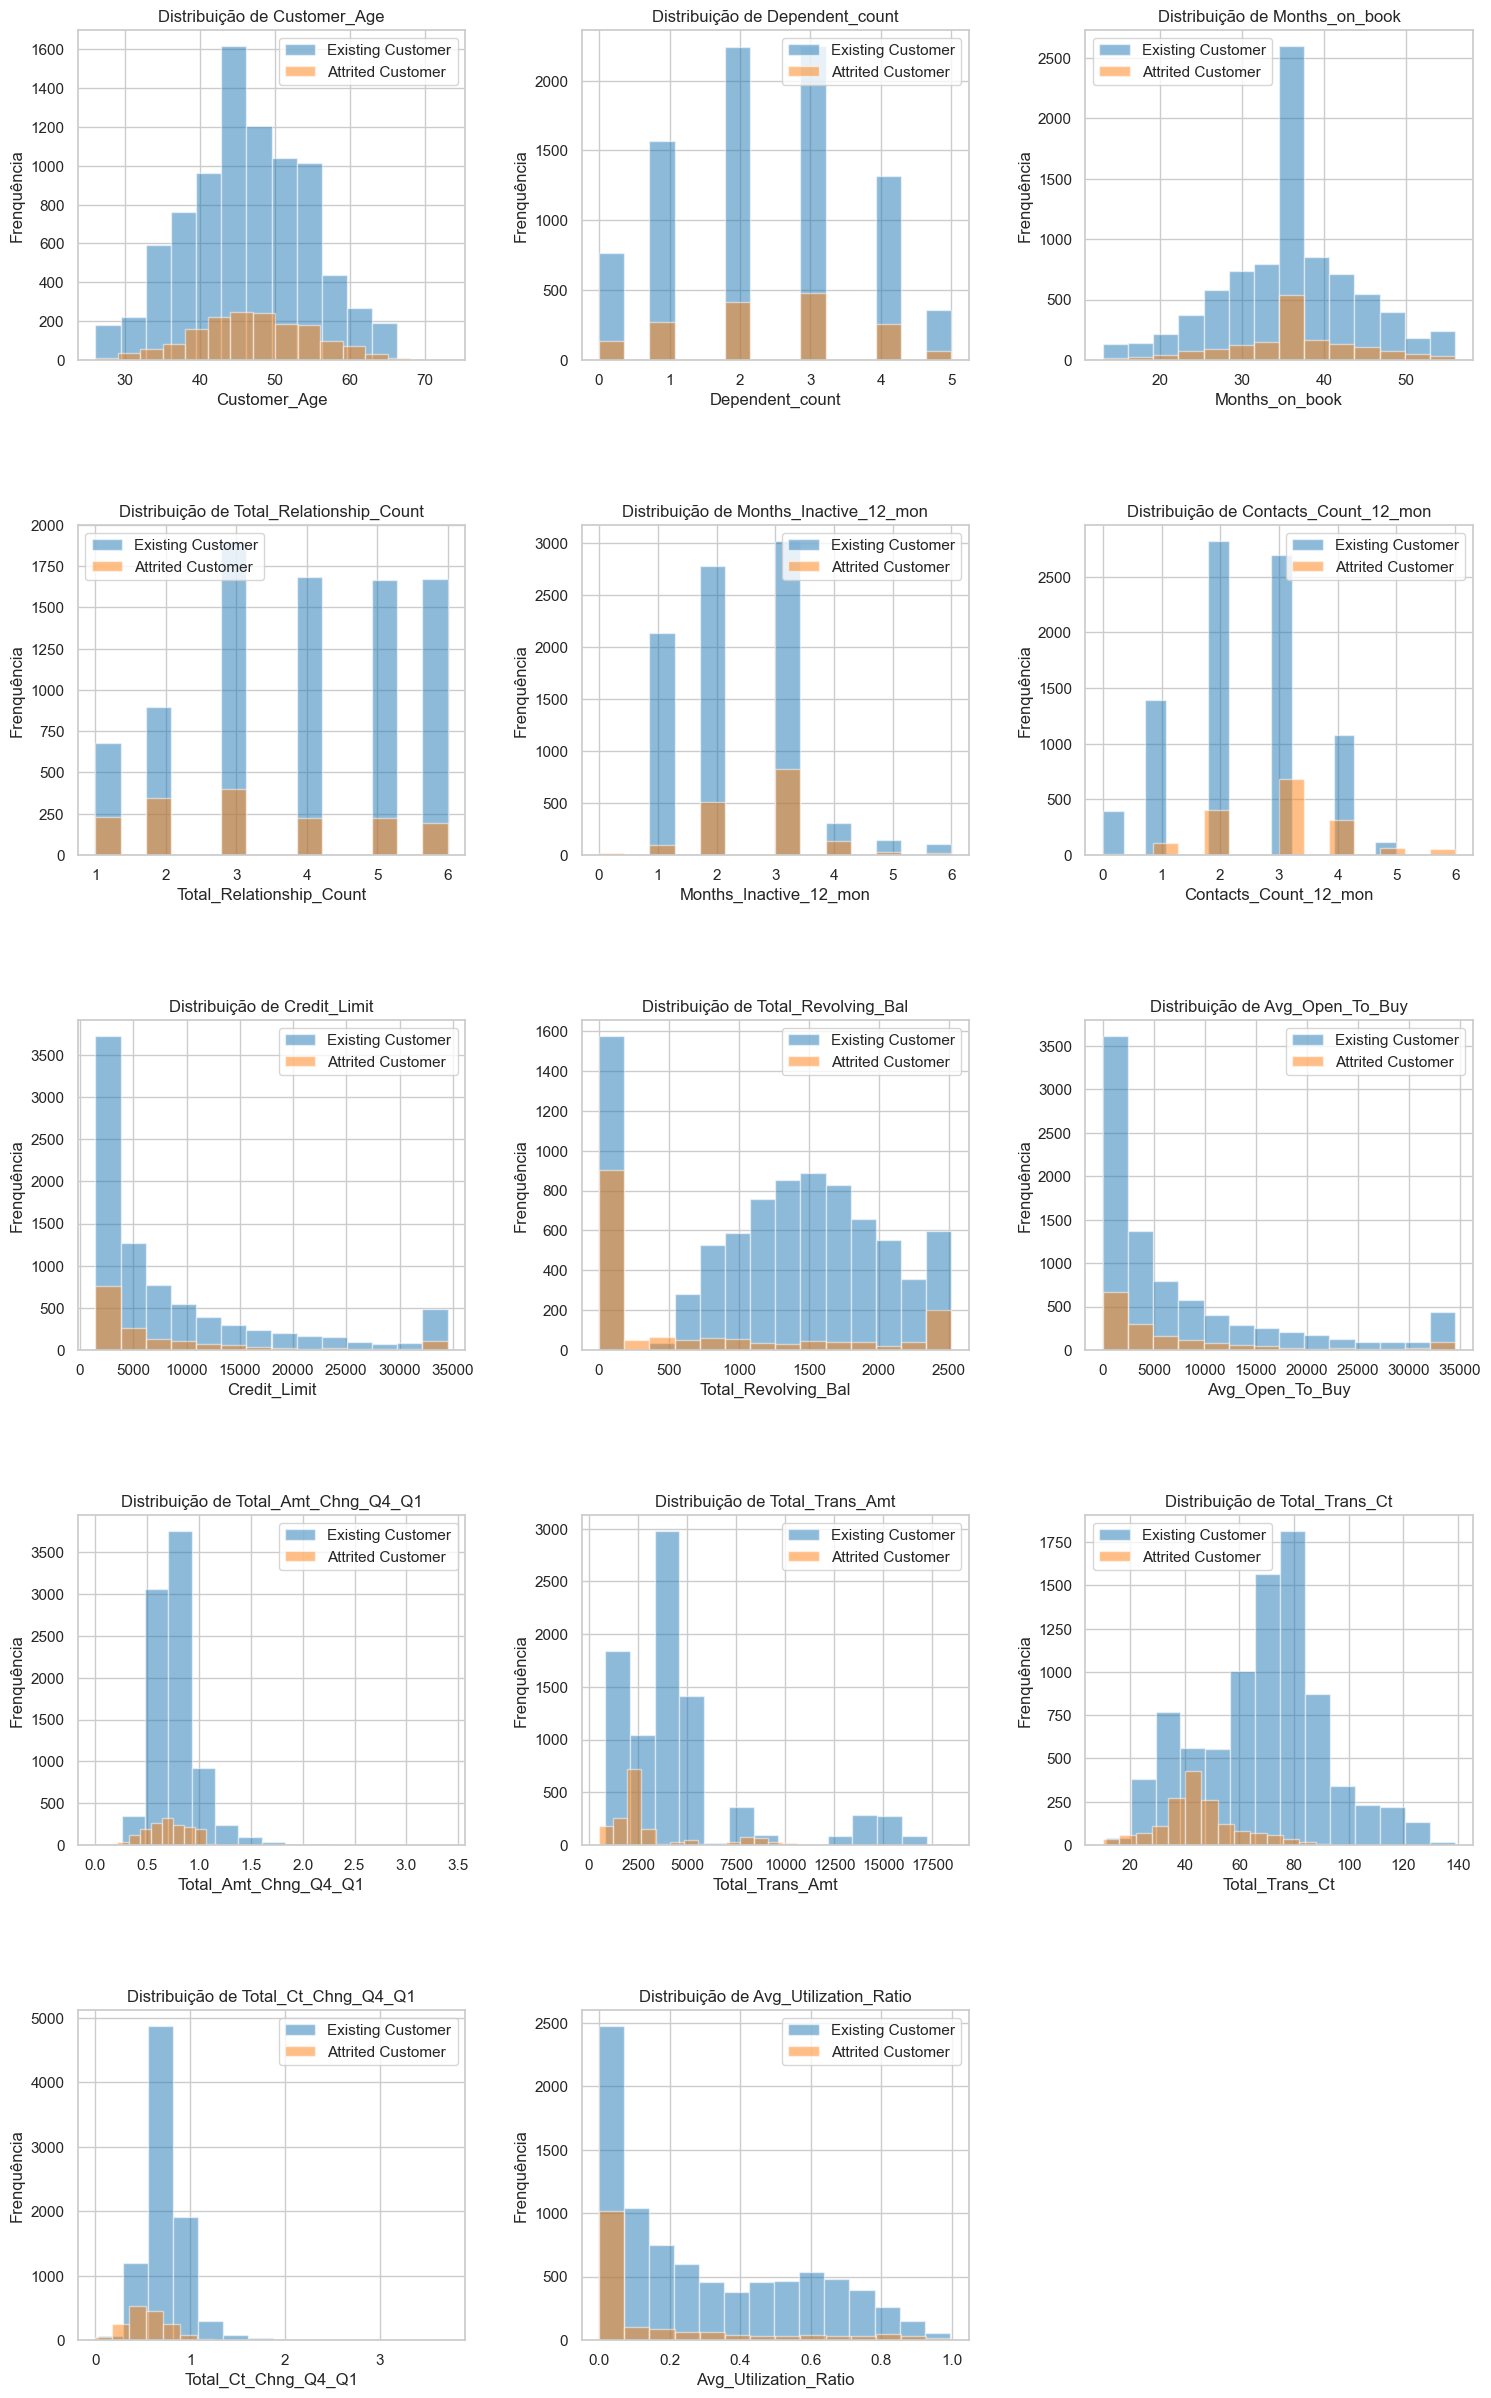

In [20]:
custom_palette = ['#1f77b4', '#ff7f0e']
# Filtrando os dados por categoria
existing_customers = df[df['Attrition_Flag'] == 'Existing Customer']
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize=(18, 30))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

variables = [
    'Customer_Age',
    'Dependent_count',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]

for ax, var in zip(axes.flatten(), variables):   
    ax.hist(existing_customers[var].dropna(), bins=14, color=custom_palette[0], alpha=0.5, label='Existing Customer')
    ax.hist(attrited_customers[var].dropna(), bins=14, color=custom_palette[1], alpha=0.5, label='Attrited Customer')
    ax.set_title(f'Distribuição de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frenquência')
    ax.legend()


axes[4, 2].axis('off')
  
plt.show()
    

* Criando gráfico de Boxplot:

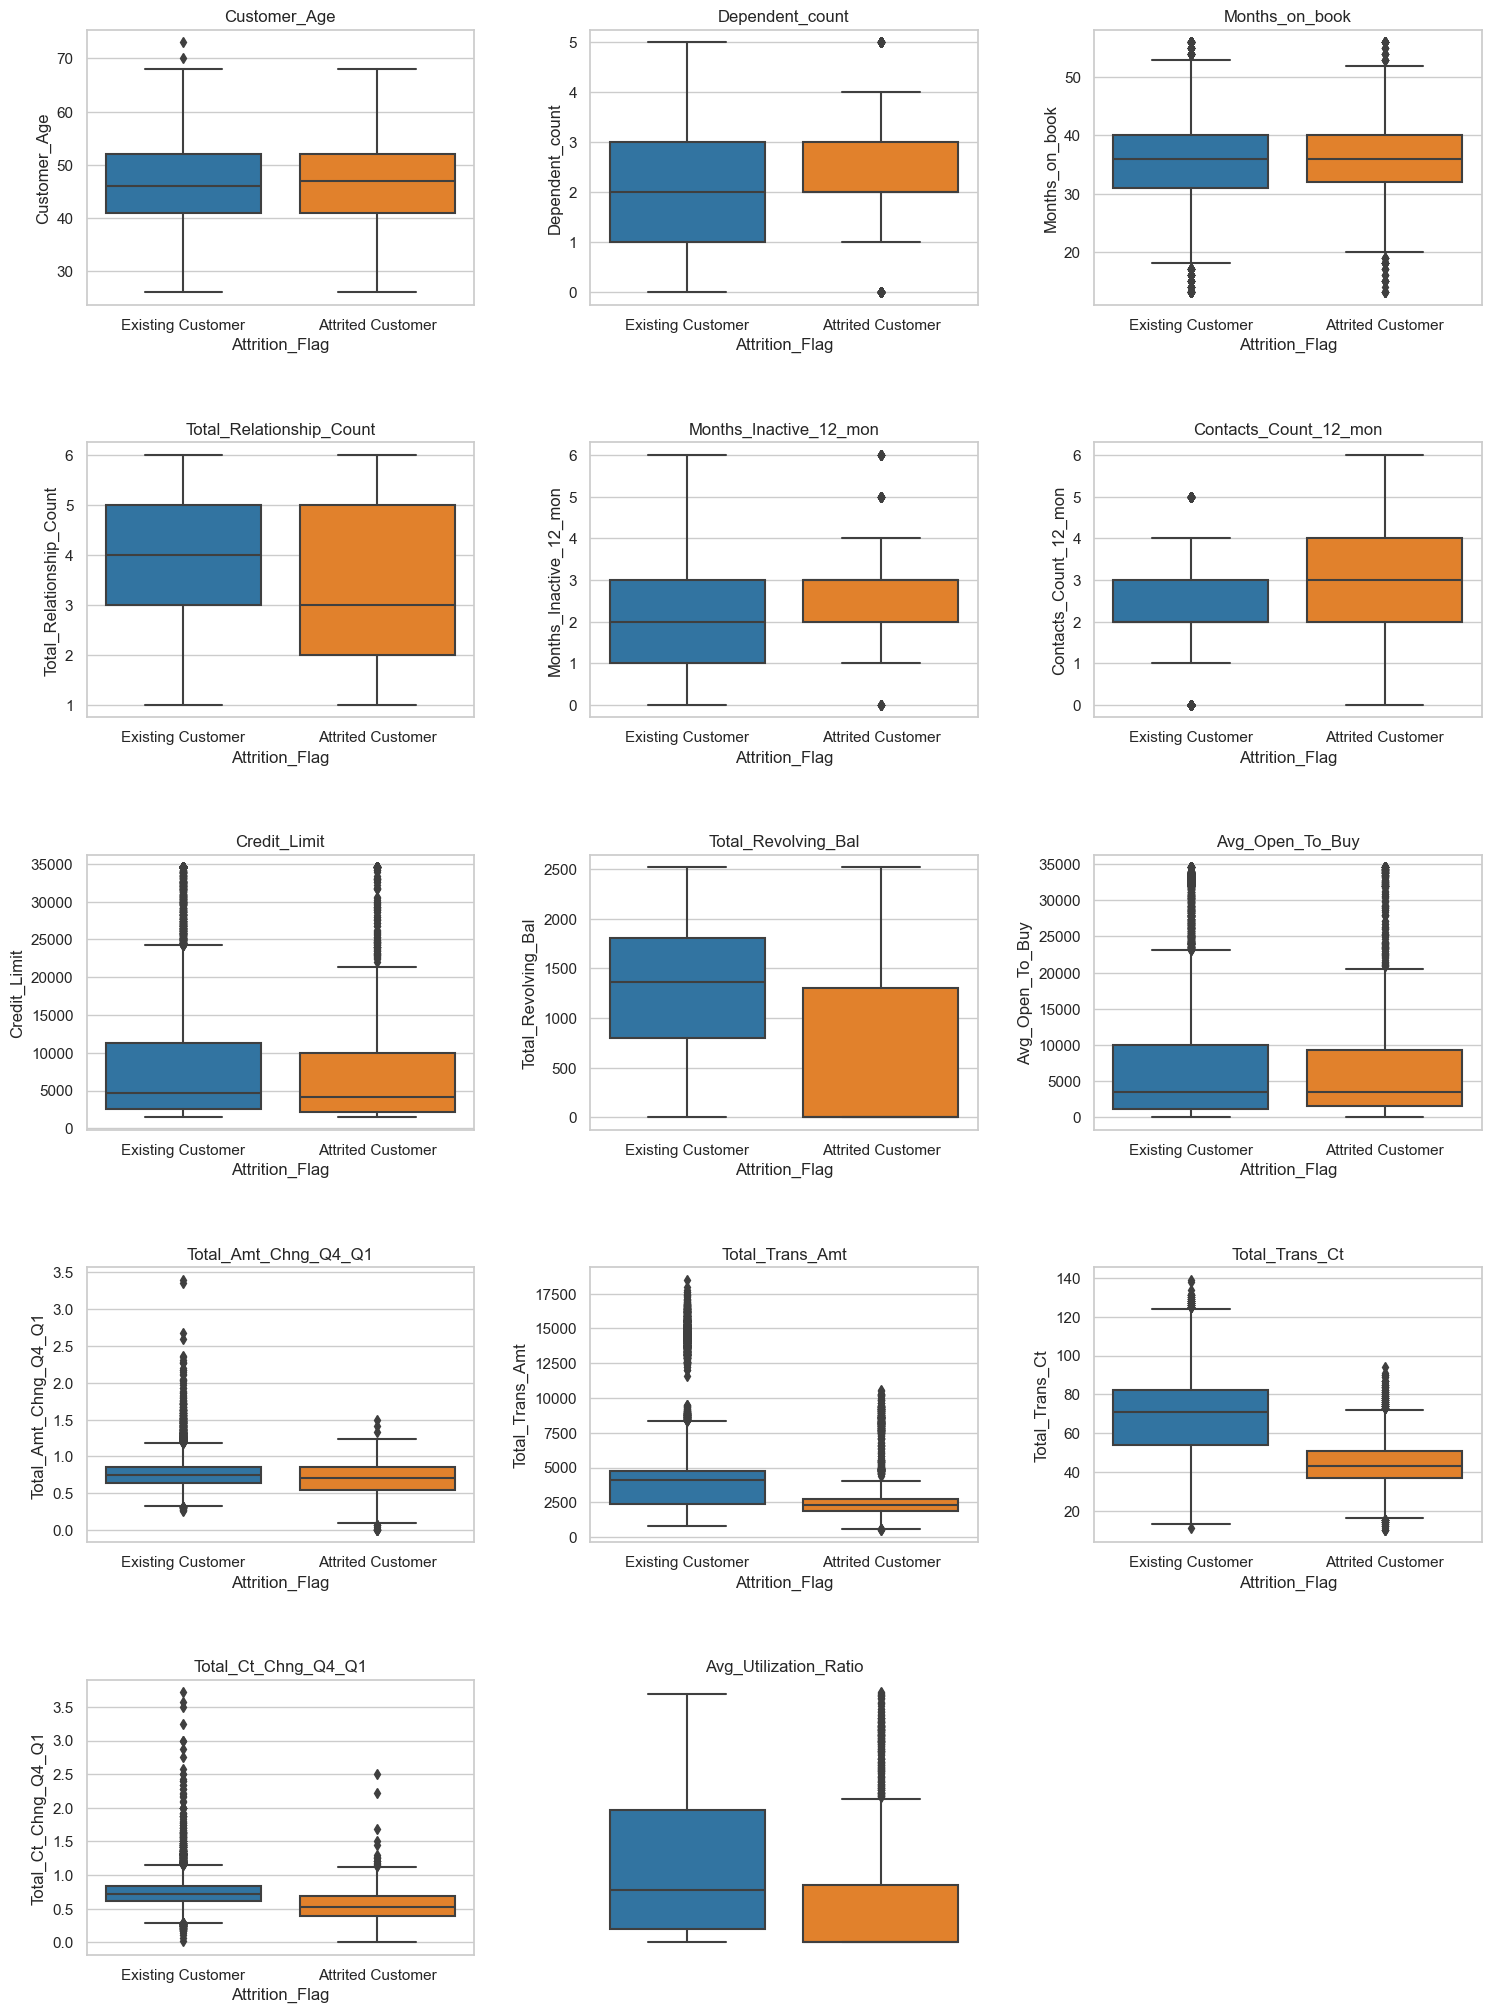

In [21]:
custom_palette = ['#1f77b4', '#ff7f0e']
# Lista das variáveis para as quais queremos criar boxplots
variables = [
    'Customer_Age',
    'Dependent_count',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]
nrows = 5
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(18, nrows * 5))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for ax, var in zip(axes.flatten(), variables):
    sns.boxplot(x='Attrition_Flag', y=var,
                palette=custom_palette,
                data=df,
                ax=ax)
    ax.set_title(f'{var}')
    ax.set_ylabel(var)
    
    axes[4, 1].axis('off')
    axes[4, 2].axis('off')

plt.show()

Analisando as correlações entre as outras colunas e 'Attrition_Flag'. Para isso irei transformar a coluna 'Attrition_Flag' em númerica.

In [138]:
df['Attrition_Flag'] = df['Attrition_Flag'].replace({
    'Existing Customer': 0,
    'Attrited Customer': 1
})

Attrition_Flag              1.000000
Contacts_Count_12_mon       0.204491
Months_Inactive_12_mon      0.152449
Dependent_count             0.018991
Customer_Age                0.018203
Months_on_book              0.013687
Avg_Open_To_Buy            -0.000285
Credit_Limit               -0.023873
CLIENTNUM                  -0.046430
Total_Amt_Chng_Q4_Q1       -0.131063
Total_Relationship_Count   -0.150005
Total_Trans_Amt            -0.168598
Avg_Utilization_Ratio      -0.178410
Total_Revolving_Bal        -0.263053
Total_Ct_Chng_Q4_Q1        -0.290054
Total_Trans_Ct             -0.371403
Name: Attrition_Flag, dtype: float64

* Analisando as variáveis que possum maior correlação com a coluna "Attrition_Flag".

In [146]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix['Attrition_Flag'].sort_values(ascending=False)

Attrition_Flag              1.000000
Contacts_Count_12_mon       0.204491
Months_Inactive_12_mon      0.152449
Dependent_count             0.018991
Customer_Age                0.018203
Months_on_book              0.013687
Avg_Open_To_Buy            -0.000285
Credit_Limit               -0.023873
CLIENTNUM                  -0.046430
Total_Amt_Chng_Q4_Q1       -0.131063
Total_Relationship_Count   -0.150005
Total_Trans_Amt            -0.168598
Avg_Utilization_Ratio      -0.178410
Total_Revolving_Bal        -0.263053
Total_Ct_Chng_Q4_Q1        -0.290054
Total_Trans_Ct             -0.371403
Name: Attrition_Flag, dtype: float64

* Podemos observar que as colunas Contacts_Count_12_mon e Months_Inactive_12_mon apresentam as correlações positivas mais significativas com a variável Attrition_Flag. Isso indica que um maior número de contatos nos últimos 12 meses e um maior número de meses inativos tendem a estar associados a uma maior probabilidade de churn.

* Por outro lado, as colunas Avg_Utilization_Ratio, Total_Ct_Chng_Q4_Q1 e Total_Trans_Ct apresentam as correlações negativas mais acentuadas. Isso sugere que menores taxas de utilização média, mudanças no número total de transações e a contagem total de transações estão relacionadas a uma menor probabilidade de churn.

##### **Insights:**
*  Clientes que abandonaram o banco tendem a ter um número maior de dependentes do que os clientes que permaneceram. Isso pode sugerir que clientes com mais responsabilidades familiares enfrentam mais dificuldades em manter o relacionamento com o banco.
*  Clientes que abandonaram o banco tendem a passar mais meses inativos nos últimos 12 meses, o que pode ser um sinal de menor engajamento e participação nas ofertas bancárias.
* Clientes que abandonaram o banco costumam ter mais contatos com o banco nos últimos 12 meses. Isso pode indicar insatisfação ou dificuldades enfrentadas, levando-os a procurar suporte antes de tomar a decisão de abandonar o banco.
* Clientes que permaneceram no banco tendem a ter saldos rotativos mais altos no cartão de crédito em comparação com aqueles que abandonaram. Isso sugere que clientes fiéis ainda confiam no banco para suas necessidades de crédito, enquanto os que abandonaram podem estar reduzindo seu uso de crédito antes da saída.
* Valor Total das Transações: O valor total das transações nos últimos 12 meses é geralmente menor para clientes que abandonaram o banco, o que pode ser um sinal de que estavam diminuindo suas atividades financeiras antes de encerrar o relacionamento.
* Frequência de Transações: Clientes que abandonaram o banco fazem um número significativamente menor de transações em comparação com clientes existentes, o que reflete um menor nível de atividade financeira.
* Utilização do Cartão de Crédito: Clientes que abandonaram o banco tendem a ter uma razão média de utilização do cartão de crédito mais baixa. Isso pode indicar que esses clientes estavam usando menos do seu limite de crédito disponível antes de deixar o banco, possivelmente como parte de um esforço para reduzir suas dívidas ou dependência de crédito.
